In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('multipleChoiceResponses.csv', encoding='ISO-8859-1')

C:\Users\vinay\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(16716, 228)

In [5]:
data.isnull().values.any()

True

# Explore Dataset!

## Gender Select

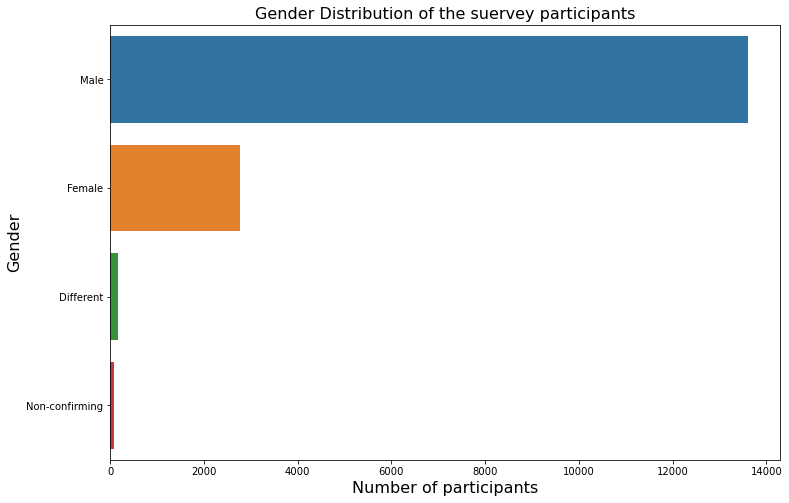

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(y='GenderSelect',data=data,order = data['GenderSelect'].value_counts().index)
plt.title("Gender Distribution of the suervey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Gender", fontsize=16)
plt.yticks(range(4), ['Male', 'Female', 'Different', 'Non-confirming'])
plt.show()



This ratio is disturbing. I am actually surprised seeing such a low number of females working in DS even in 2017.

## Country

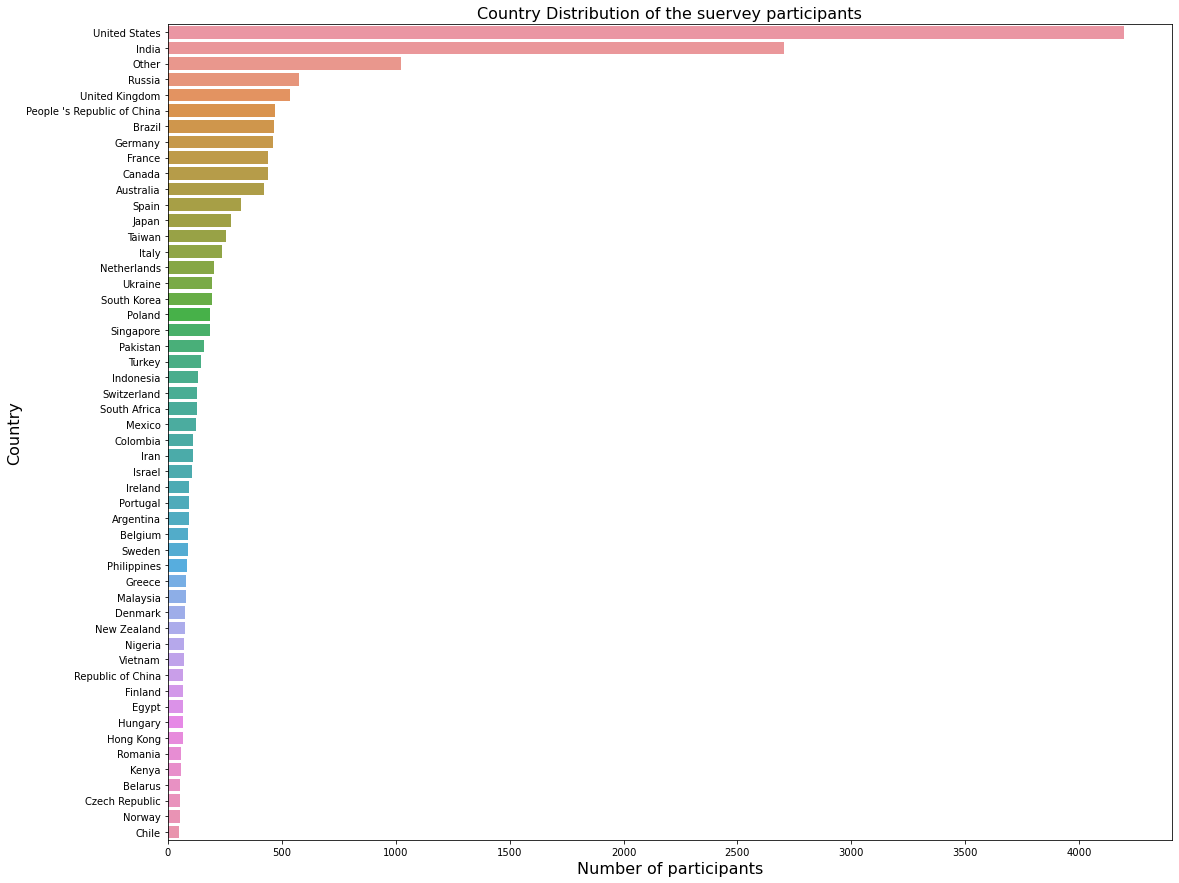

In [7]:
plt.figure(figsize=(18,15))
sns.countplot(y='Country',data=data,order = data['Country'].value_counts().index)
plt.title("Country Distribution of the suervey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Country", fontsize=16)
plt.show()

So, most of the people working in the field of data science are based in United States followed by India, Russia and United Kingdom. It's a surprise that countries like Germany, China and Japan are lagging behind here.

## Age

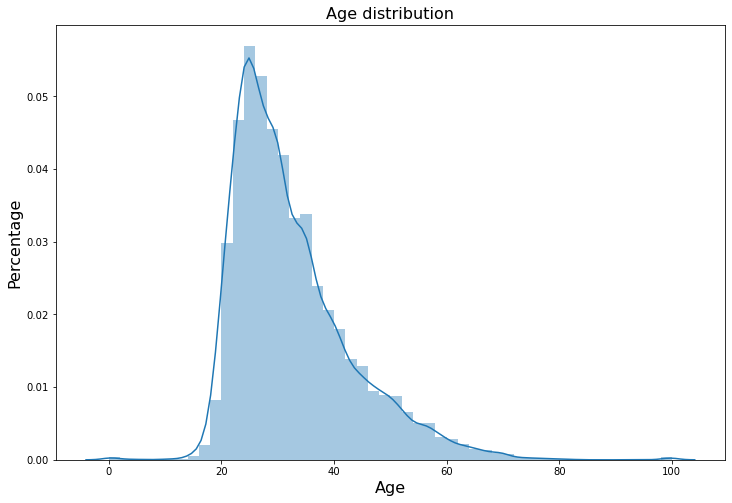

In [8]:
plt.figure(figsize=(12,8))
sns.distplot(data.Age)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Percentage',fontsize=16)
plt.title('Age distribution',fontsize=16)
plt.show()

Maximum people doing DS are somewhat between 19-35. Let's see what's the age difference between the top two countries

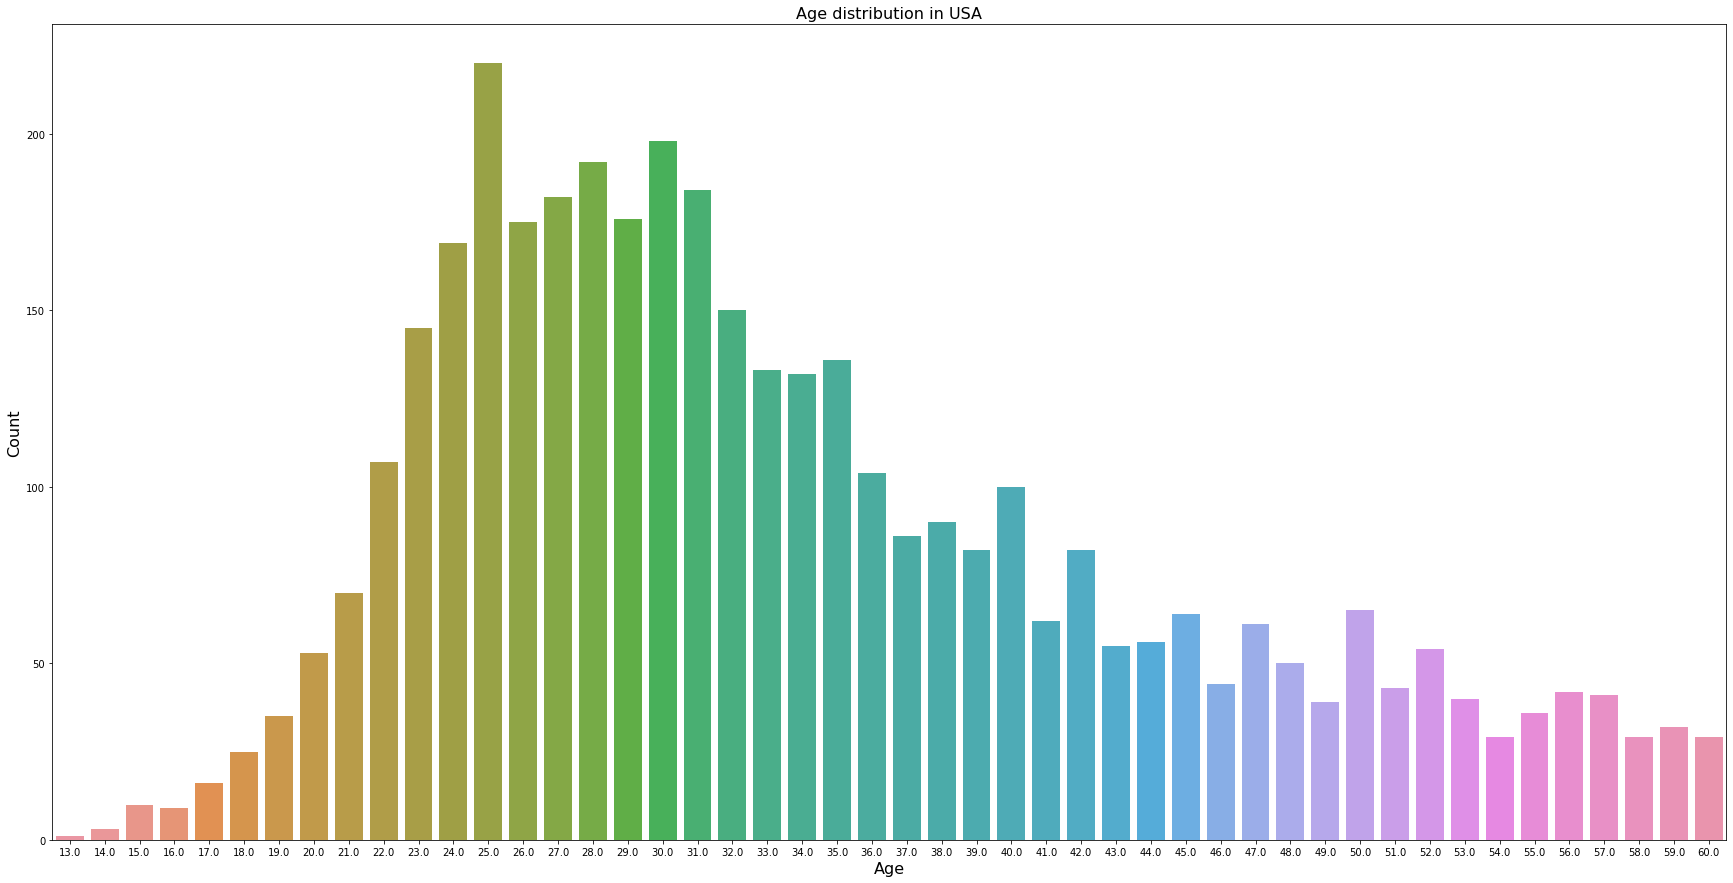

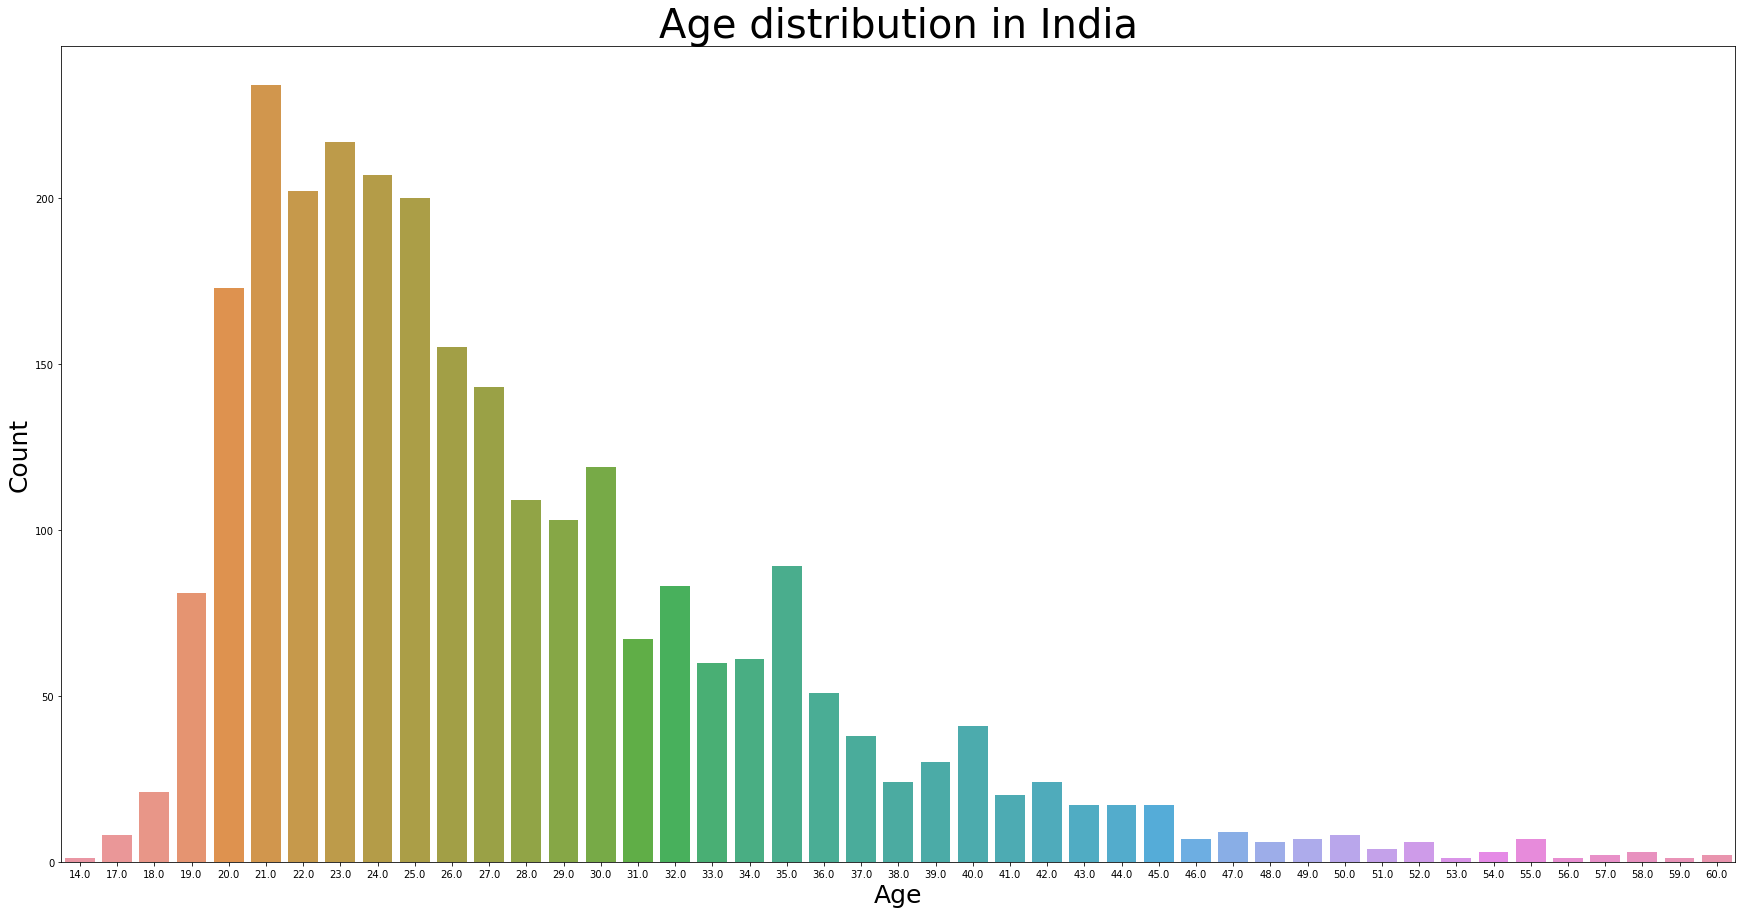

In [9]:
age_country = data[['Country', 'Age']]
# Drop the null values
age_country = age_country.dropna()
# Drop values > 60 and < 10
age_country = age_country.drop(age_country.index[(age_country['Age'] > 60) | (age_country['Age'] < 10)]).reset_index(drop=True)
# Get USA and India from the groups
age_USA = age_country.groupby('Country').get_group('United States')
age_India = age_country.groupby('Country').get_group('India')


# Count and plot 
age_count = age_USA.Age.value_counts()
plt.figure(figsize=(30,15))
sns.barplot(x=age_count.index, y=age_count.values)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Age distribution in USA',fontsize=16)
plt.show()


age_count = age_India.Age.value_counts()
plt.figure(figsize=(30,15))
sns.barplot(x=age_count.index, y=age_count.values)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.title('Age distribution in India',fontsize=40)
plt.show()


While the minimum age in USA is less than minimum age in India but the mode age in India is much better as compared to USA. In USA, maximum people doing DS are of age 25-35 while in India it is between 21-27. Nice.

## Employment Status

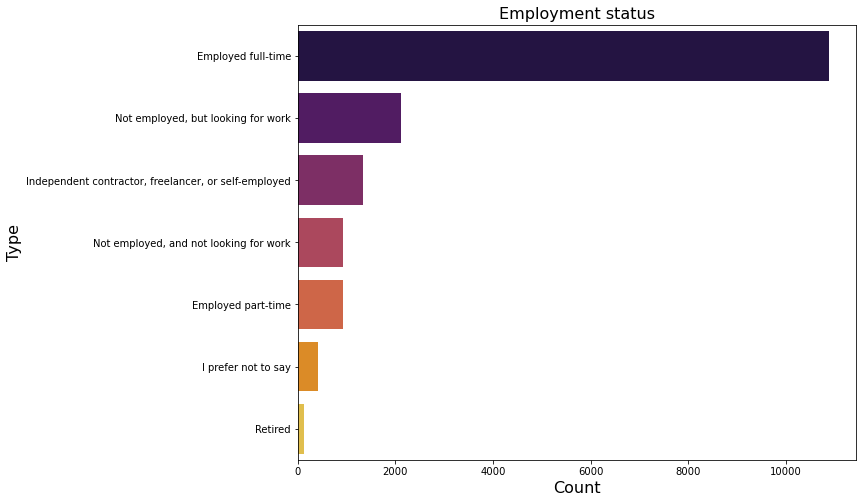

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(y='EmploymentStatus',data=data,orient='h',order = data['EmploymentStatus'].value_counts().index,palette=sns.color_palette('inferno',7))
plt.title('Employment status', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Type', fontsize=16)
plt.show()   

Most of the people are employed full time which is obvious given the demand now-a-days. The most interesting are the ones who are not employed and still not looking for work. (Attitude!!)

## Major Select

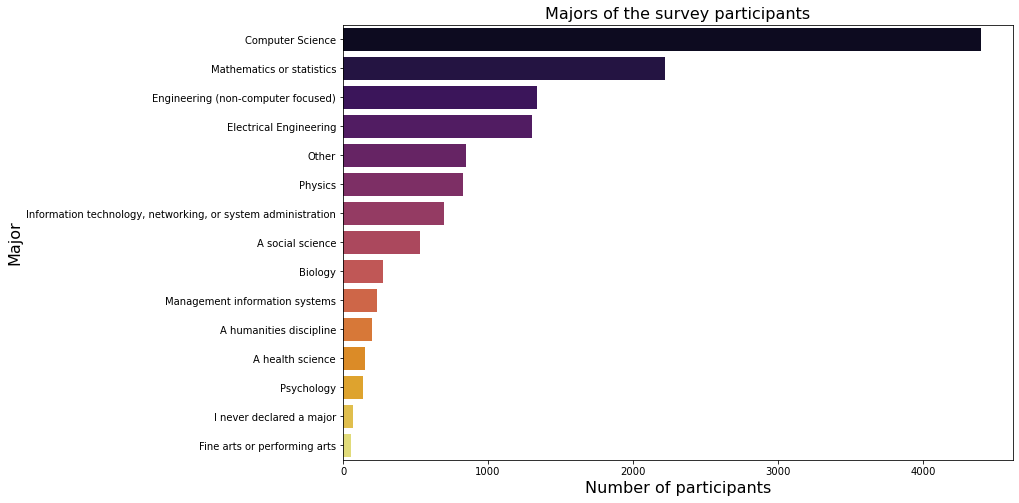

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(y=data['MajorSelect'] ,data=data,orient='h',order = data['MajorSelect'].value_counts().index,palette=sns.color_palette('inferno',15))
plt.title("Majors of the survey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Major", fontsize=16)
plt.show()

The majority of our respondents have their undergraduate majors in Computer Science, Mathematics or Engineering. Math and CS also happen to be the fields whose intersection is Data Science. That said, the number of majors reprsented in our dataset is fairly diverse with people coming in from all walks of life including humanities, fine arts and liberal arts.

## Current Job Title Select

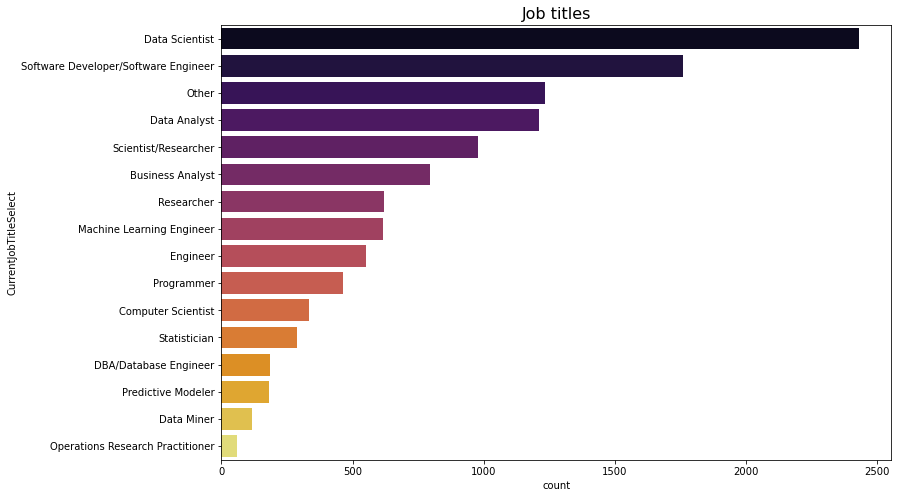

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(y=data['CurrentJobTitleSelect'] ,data=data,order = data['CurrentJobTitleSelect'].value_counts().index,palette=sns.color_palette('inferno',16))
plt.title("Job titles", fontsize=16)
plt.show()

## Formal Education

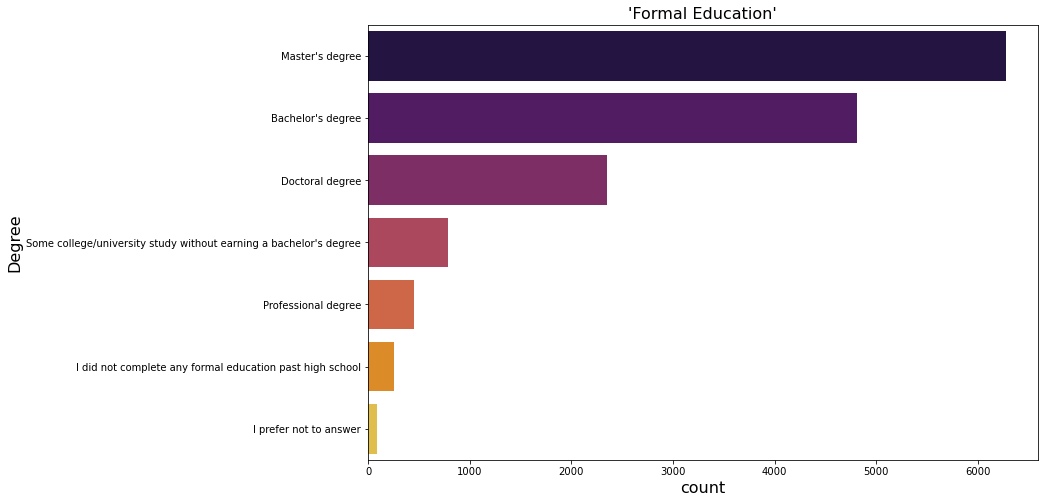

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(y=data['FormalEducation'] ,data=data,orient='h',order = data['FormalEducation'].value_counts().index,palette=sns.color_palette('inferno',7))
plt.title("'Formal Education'", fontsize=16)
plt.xlabel("count", fontsize=16)
plt.ylabel("Degree", fontsize=16)
plt.show()

A large fraction of our users have a Master's Degree which alludes the importance of formal education in the field of Data Science. Bachelor's Degree holders come in second. A considerable number of people also have a Doctoral Degree which.

## Coding experience(in years)

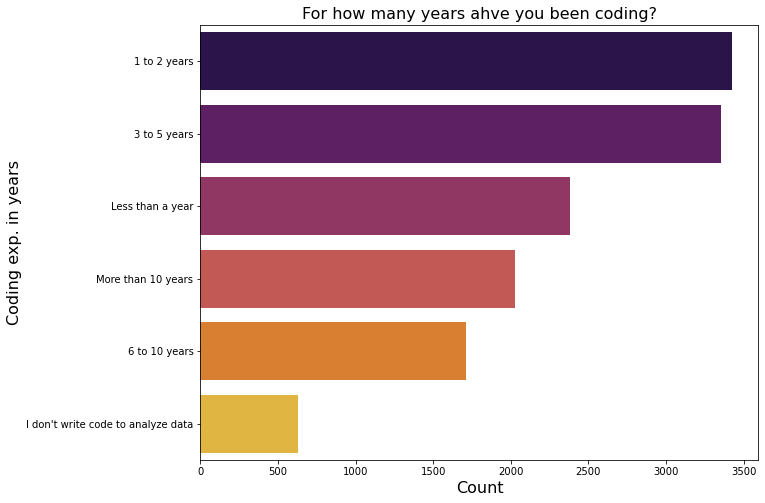

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(y=data['Tenure'] ,data=data,order = data['Tenure'].value_counts().index,palette=sns.color_palette('inferno',6))
plt.title("For how many years ahve you been coding?", fontsize=16)
plt.ylabel("Coding exp. in years", fontsize=16)
plt.xlabel("Count", fontsize=16)
plt.show()

Most of our respondents have less than 5 years of experience of writing code. A considerable chunk have less than 2 years of experience writing code

## Next Task
### What do Kagglers say about Data Science ?